In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv', delimiter = ';')

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
print("Total Columns", df.shape[1])

Total Columns 21


In [73]:
features = df.drop(columns=['y'])
print("Number of features: ", features.shape[1])

Number of features:  20


We only want to keep original 16 features

In [74]:
# define original 16 features from df
original_16_features = [
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
    'poutcome', 'emp.var.rate', 'cons.price.idx'
]

# create new df with only these features and target variable
df_16 = df[original_16_features + ['y']]

In [75]:
df_16.head()


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,no


In [76]:
# seperate features and target
X_16 = df_16.drop(columns=['y'])
y_16 = df_16['y']

In [77]:
# check for missing values
print(X_16.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
dtype: int64


Model 1 Full One Hot Encode brings features to 55. (Better for tree-based, trees handlu redundancy well)

Model 2 Reduced One Hot Encode (Better for clustering, less dimensional noise)

In [78]:
# id and one hot encode categorical variables
categorical_cols = X_16.select_dtypes(include= ['object']).columns.tolist()
model1 = pd.get_dummies(X_16, columns=categorical_cols, drop_first=False)
model2 = pd.get_dummies(X_16, columns=categorical_cols, drop_first=True)

In [79]:
print(model1.shape[1])
print(model2.shape[1])

55
46


In [80]:
model1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [81]:
model2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [82]:
# Save to csv for model 1 supervised model
df_model1 = model1.copy()
df_model1['y'] = y_16
df_model1.to_csv('df_model1.csv', index=False)

In [83]:
# Save to csv for model 2 unsupervised model
df_model2 = model2.copy()
model2.to_csv('df_model2.csv', index=False)

Now let's perform some EDA
Distribution of Target Variable (y)

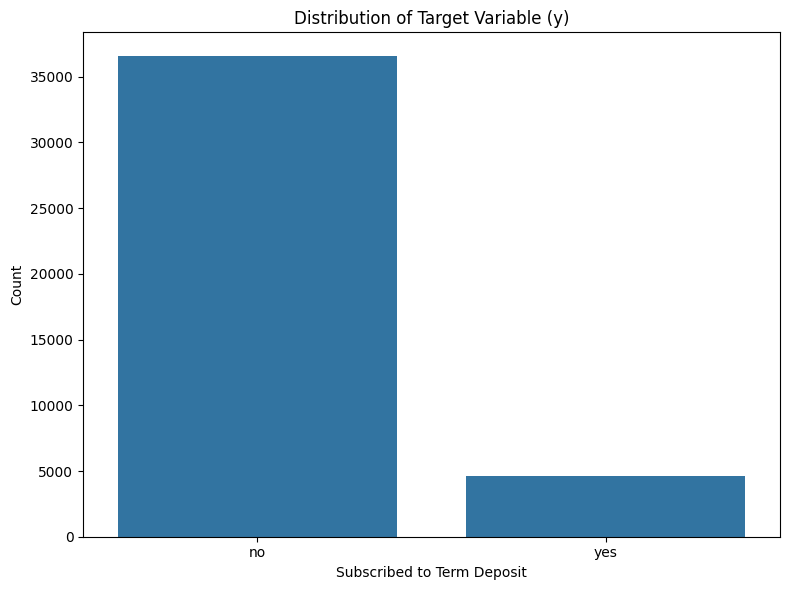

In [84]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x=y_16)
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Boxplot of age by Target Variable

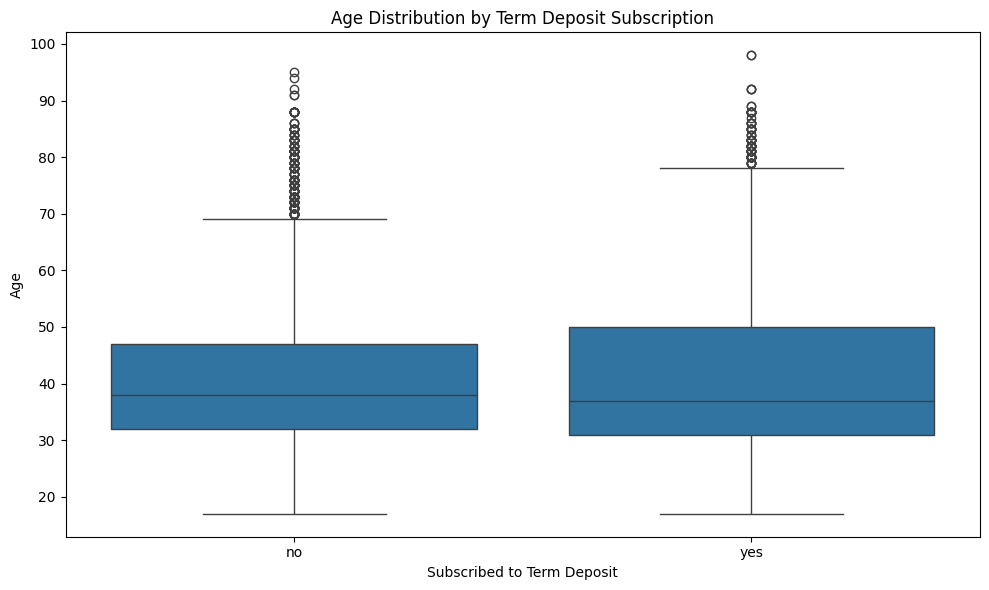

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x=y_16, y=X_16['age'])
plt.title("Age Distribution by Term Deposit Subscription")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

 Countplot of education levels

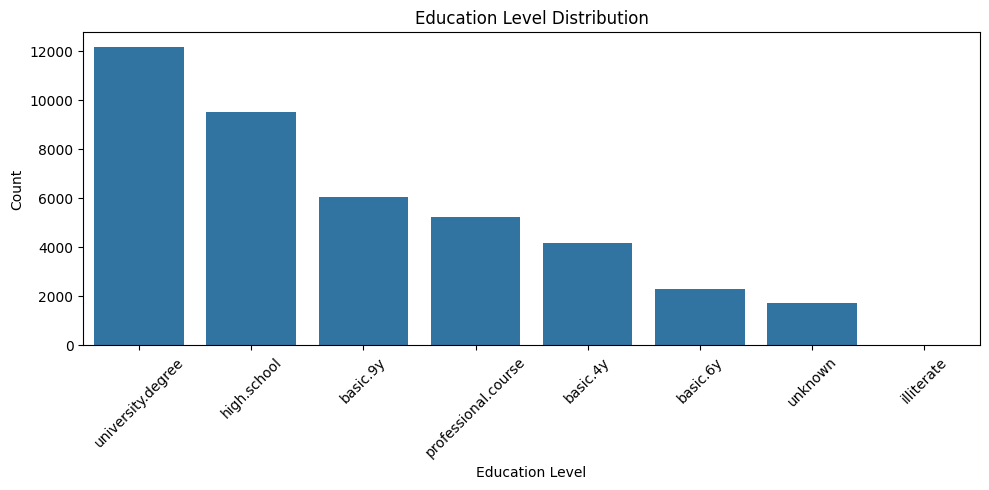

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(data=X_16, x='education', order=X_16['education'].value_counts().index)
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Top 20 Correlation Heatmap of All Encoded Features

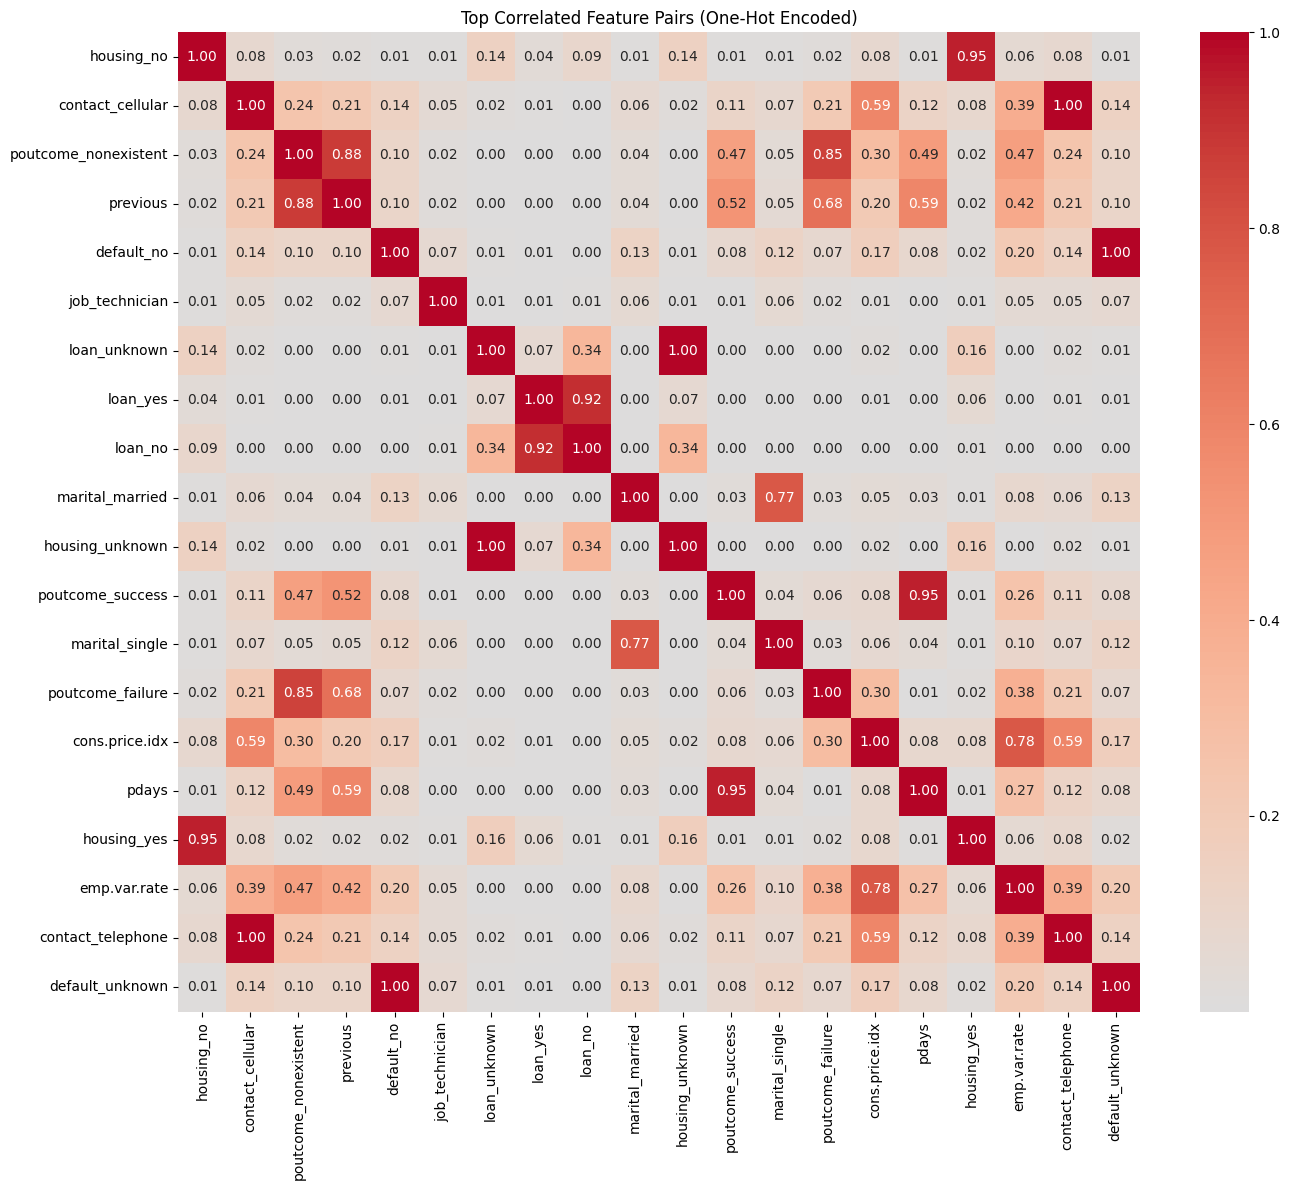

In [87]:
plt.figure(figsize=(14, 12))
corr_matrix = X_16_encoded.corr().abs()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_tri = corr_matrix.where(mask)

sorted_pairs = (
    upper_tri.stack().sort_values(ascending=False)
)
top_features = set()
for i, j in sorted_pairs.index:
  if len(top_features) >= 20:
    break
  top_features.add(i)
  if len(top_features) >= 20:
    break
  top_features.add(j)


filtered_corr = corr_matrix.loc[list(top_features), list(top_features)]
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt='.2f', center=0)
plt.title("Top Correlated Feature Pairs (One-Hot Encoded)")
plt.tight_layout()
plt.show()

In [88]:
df_model1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
3,40,151,1,999,0,1.1,93.994,True,False,False,...,False,False,True,False,False,False,False,True,False,no
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,True,False,False,False,False,True,False,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,True,False,False,False,True,False,yes
41184,46,383,1,999,0,-1.1,94.767,False,True,False,...,False,False,False,True,False,False,False,True,False,no
41185,56,189,2,999,0,-1.1,94.767,False,False,False,...,False,False,False,True,False,False,False,True,False,no
41186,44,442,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,True,False,False,False,True,False,yes


In [89]:
df_model2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,False,False,True,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,True,False,False,...,False,False,False,False,False,True,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,False,False,False,...,False,False,False,False,False,True,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [90]:
print("Total Columns Model 1 df: ", df_model1.shape[1])
print("Total Columns Model 2 df: ", df_model2.shape[1])


Total Columns Model 1 df:  56
Total Columns Model 2 df:  46
